
**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [2]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [7]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))
    

Espaçamento entre os dados: 0.0320570678937734


Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

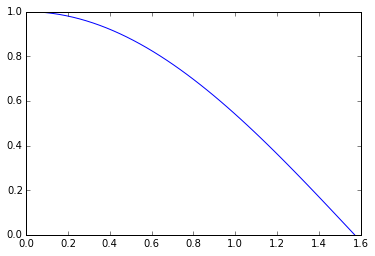

In [10]:
# habilitar a biblioteca a biblioteca do matplotlib no navegador
%matplotlib inline 
import matplotlib.pylab as plt # carregar a biblioteca do matplotlib
plt.figure # mostrar gráfico
plt.plot(tempos, dados) # mostrar o gráfico de dados em função de tempos

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [11]:
integralretangulo = 0 # iniciar uma operação com o primeiro elemento igual a zero
for valor in dados: # fazer a variável valor iterar sobre a lista dados
    integralretangulo = valor * intervalo + integralretangulo # definir a operação da área do retâgulo (integralretângulo) como a soma de todos os valores do intervalo ou seja, o valor calculado da integral do retângulo
print(integralretangulo) # mostrar o valor da área calculada

1.01594289451325


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [12]:
rtrue = 1
rcalc = (integralretangulo) # integral calculada do retângulo
E = abs (rtrue - rcalc) # o erro se trata da diferença da integral verdadeira (1) e da calculada pelo método dos retângulos, sendo que este último,possui alguns erros para mais e para menos de acordo com que os retgulos ficam acima e abaixo da curva da função.
print(E)


0.01594289451325004


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

# O erro se trata da diferença da integral verdadeira (1) e da calculada pelo método dos retângulos, sendo que este último,possui alguns erros para mais e para menos de acordo com que os retgulos ficam acima e abaixo da curva da função.


### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [13]:
integraltrap = 0 # iniciar uma operação com o primeiro elemento igual a zero
N = len(dados) # estabelecer que a string N é igual ao número de elementos da lista dados
for i in range (0, N-1, 1): # fazer a variável 'i' iterar sobre a lista gerada pelo 'range' a partir de N
    integraltrap = intervalo * (dados[i] + dados[i+1])/2 + integraltrap # definir o operação da área do trapézio como a soma dos elementos do intervalo (base vezes altura sobre dois) sendo este o valor calculado da integral do trapézio
print(integraltrap) # mostrar o valor da área calculada

0.9999143605663631


Calcule e imprima também a solução analíca e o erro cometido.

In [14]:
rtrue = 1
rcalc = (integraltrap)
Etrap = abs (rtrue - rcalc) # cálculo do erro entre valor da área verdadeiro do trapézio e o valor calculado
print(Etrap) # mostrar o valor do erro obtido


8.563943363693038e-05


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

#o erro é menor doque para as regra dos retangulos.Porque a configuraçao dos trapezios resulta num preenchimento mais preciso dentro da curva, por isso, esse resultado era esperad

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [20]:
inicio = 0 # iniciar uma operação com o primeiro elemento igual a zero
fim = math.pi/2 # definir o intervalo de integração que vai de 'inicio = 0' à 'fim = pi/2'
N = 1010 # definir N = 1010 para que futuramente no cálculo a ser realizado a lista gerada contenha o elemento 1000º
E = [] # definir uma lista vazia para o erro do retângulo
Etrap = [] # definir uma lista vazia para o erro do trapézio

for valor in range(10, N, 10): # fazer a variável 'valor' iterar sob a lista N gerada pelo 'range' do primeiro ao 1000º elemento 
    intervalo = (fim - inicio)/(valor - 1) # definir a operação para o cálculo de cada valor do intervalo
    
    tempos = [] # definir uma lista vazia 'tempos' para que seja colocados os valores gerados em 't'
    dados = [] # definir uma lista vazia 'dados' para que seja colocados os valores gerados em t
    
    for i in range(valor): # fazer a variável'i' iterar sobre 'valor' iterado no 'for' anterior
        t = inicio + i * intervalo # operação para definir o espaçamento entre os dados
        tempos.append(t) # adicionar os valores obtidos em 't' na lista 'tempos'
        dados.append(math.cos(t)) # adicionar os valores obtidos em 't' na lista 'dados'
    
    integralretangulo = 0 # iniciar uma operação com o primeiro elemento igual a zero
    for valor in dados: # fazer a variável valor iterar sobre a lista dados
        integralretangulo = valor * intervalo + integralretangulo # definir a operação da área do retâgulo (integralretângulo) como a soma de todos os valores do intervalo ou seja, o valor calculado da integral do retângulo
    Erro = abs(rtrue - integralretangulo) # operação para definir o erro entre a integral verdadeira e a integral calculada
    E.append(Erro) # adicionar os valores obtidos em cada iteração do Erro na lista 'E'
    
    integraltrap = 0 # iniciar uma operação com o primeiro elemento igual a zero
    N = len(dados) # estabelecer que a string N é igual ao número de elementos da lista dados
    for i in range (0, N - 1, 1): # fazer a variável 'i' iterar sobre a lista gerada pelo 'range' a partir de N
        integraltrap = intervalo * (dados[i] + dados[i+1])/2 + integraltrap # definir o operação da área do trapézio como a soma dos elementos do intervalo (base vezes altura sobre dois) sendo este o valor calculado da integral do trapézio
    Errotrap = abs(rtrue - integraltrap) # operação para definir o erro entre a integral verdadeira e a integral calculada
    Etrap.append(Errotrap) # adicionar os valores obtidos em cada iteração do 'Errotrap' à lista 'Etrap'
    


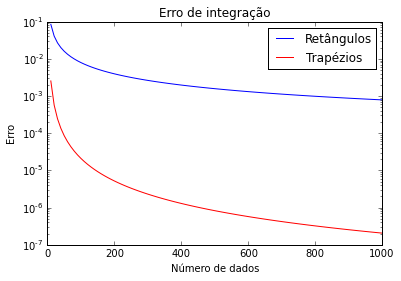

In [21]:
lista = range(10, 1010, 10) # definir uma lista gerada pelo 'range' iniciando em dez com intervalos de dez em dez até dez mil e dez

plt.figure() # mostar o gráfico
plt.plot(lista, E, '-b', label = 'Retângulos') # gerar um gráfico da lista em função do erro de integração do retângulo
plt.plot(lista, Etrap, '-r', label = 'Trapézios') # gerar um gráfico da lista em função do erro de integração do trapézio
plt.yscale('log') # colocar o eixo y em escala logarítmica
plt.xlabel('Número de dados') # nomear o eixo 'x' de 'Número de dados'
plt.ylabel('Erro') # nomear o eixo 'y' de erro
plt.title('Erro de integração') # nomear o gráfico de 'Erro de integração'
plt.legend() # colocar a legenda no gráfico

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.